<a href="https://colab.research.google.com/github/PacktPublishing/Modern-Computer-Vision-with-PyTorch-2E/blob/main/Chapter07/Understanding_selectivesearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [1]:
from torch_snippets import *
import selectivesearch
from skimage.segmentation import felzenszwalb
import numpy as np

In [2]:
img = read("MyImage.jpg", 1)

In [3]:
segments_fz = felzenszwalb(img, scale=200)

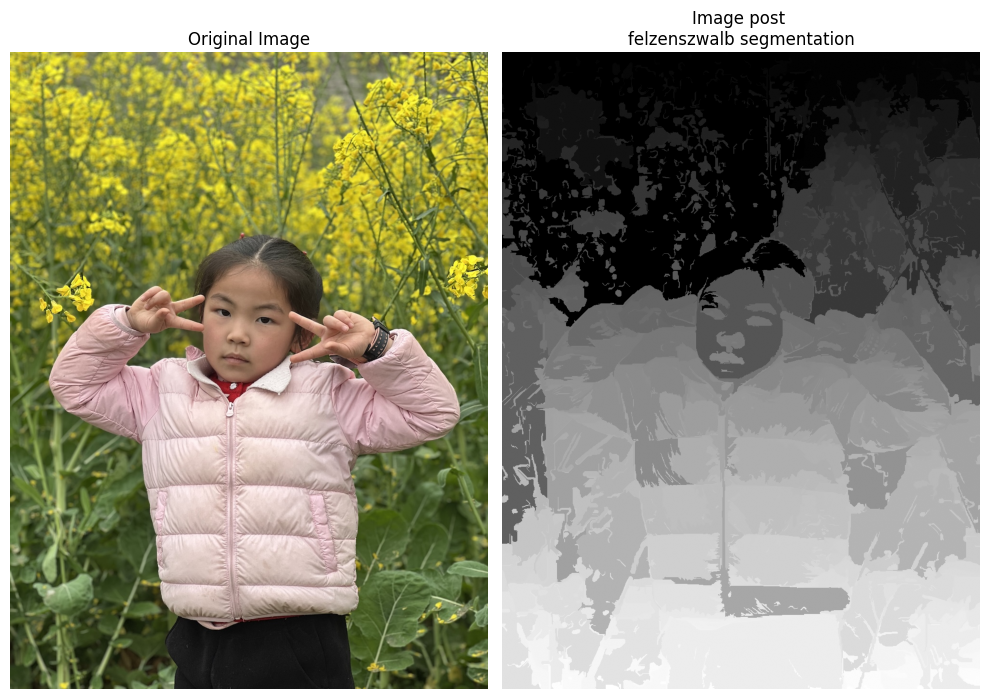

In [4]:
subplots(
  [img, segments_fz],
  titles=["Original Image", "Image post \nfelzenszwalb segmentation"],
  figsize=(10, 10),
  nc=2,
)

In [5]:
def extract_candidates(img):
  img_lbl, regions = selectivesearch.selective_search(img, scale=200, min_size=100)
  img_area = np.prod(img.shape[:2])
  candidates = []
  for r in regions:
    if r["rect"] in candidates:
      continue
    if r["size"] < (0.05 * img_area):
      continue
    if r["size"] > (1 * img_area):
      continue
    x, y, w, h = r["rect"]
    candidates.append(list(r["rect"]))
  return candidates


/Users/yangjing/miniconda3/envs/learn-ai/lib/python3.12/site-packages/skimage/feature/texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


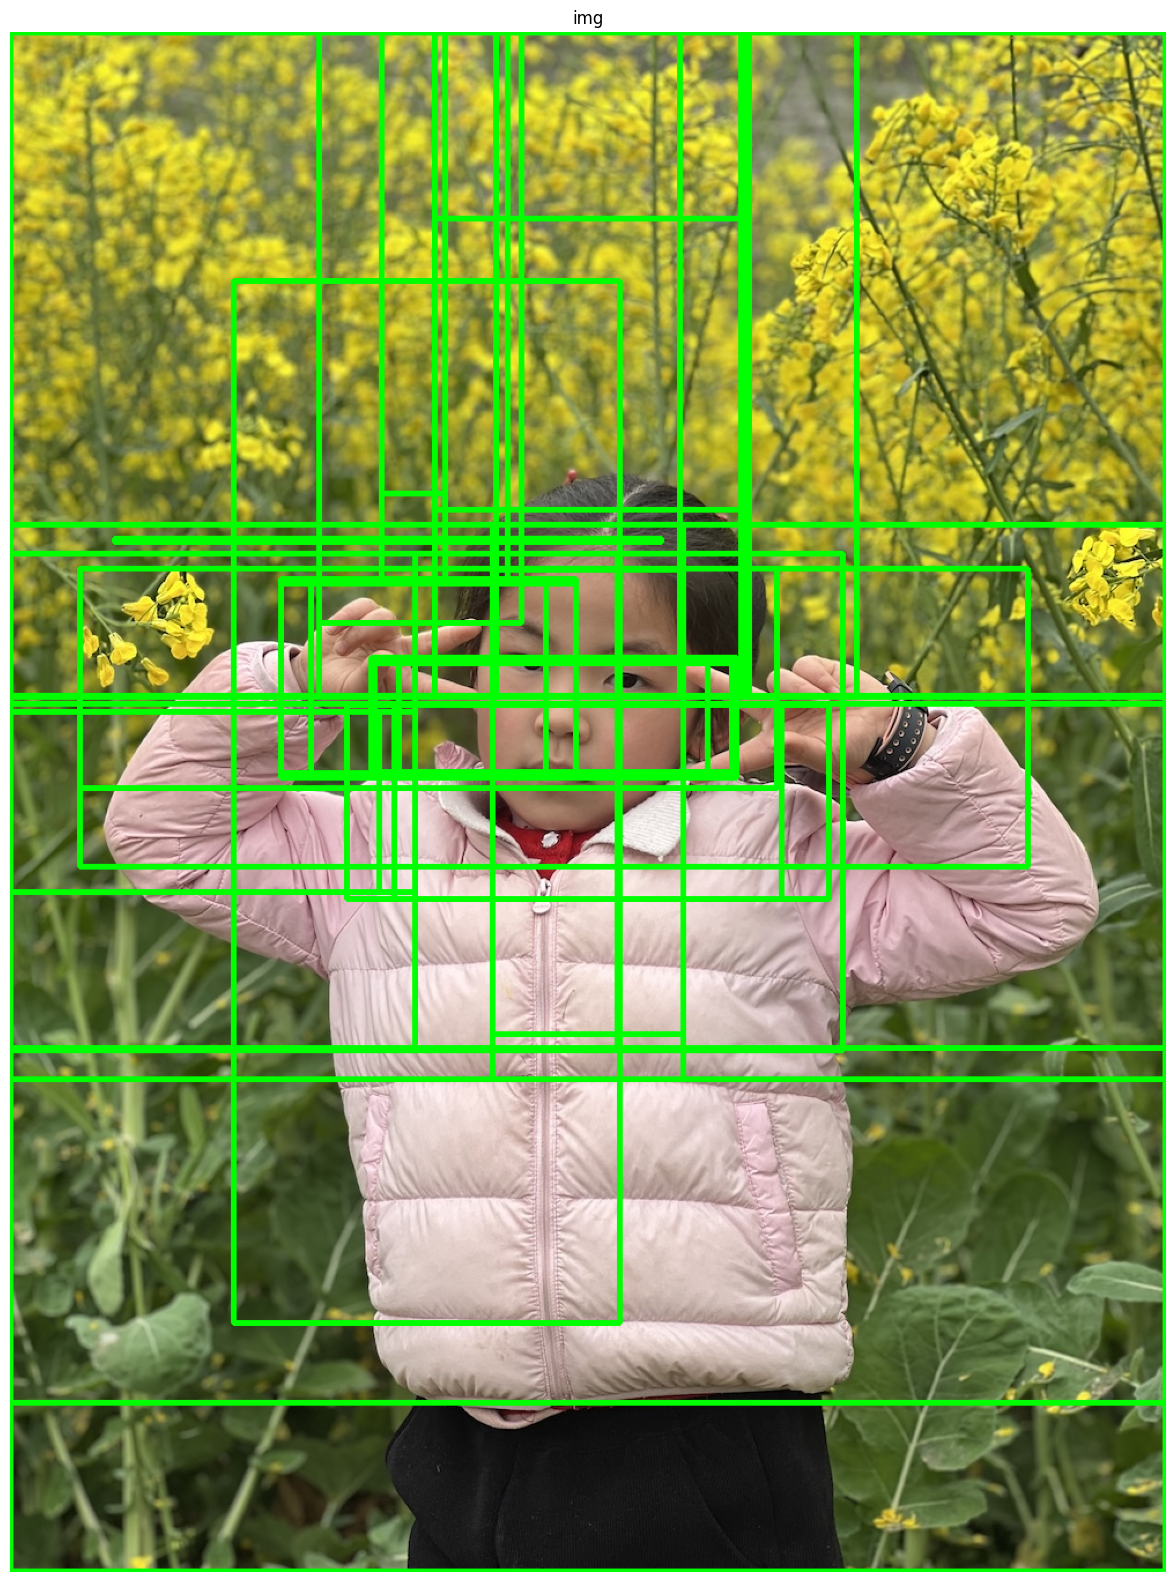

In [6]:
candidates = extract_candidates(img)
show(img, bbs=candidates)